# Adidas Sales Dataset Analysis

This notebook analyses the sales data of Adidas, focusing on uncovering trends of what drives the most sales and profit for Adidas.

## Exploratory Analysis

In [300]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_excel("data/raw/Adidas US Sales Datasets.xlsx")
print(df.head())


   Unnamed: 0   Unnamed: 1             Unnamed: 2           Unnamed: 3  \
0         NaN          NaN  Adidas Sales Database                  NaN   
1         NaN          NaN                    NaN                  NaN   
2         NaN          NaN                    NaN                  NaN   
3         NaN     Retailer            Retailer ID         Invoice Date   
4         NaN  Foot Locker                1185732  2020-01-01 00:00:00   

  Unnamed: 4 Unnamed: 5 Unnamed: 6             Unnamed: 7      Unnamed: 8  \
0        NaN        NaN        NaN                    NaN             NaN   
1        NaN        NaN        NaN                    NaN             NaN   
2        NaN        NaN        NaN                    NaN             NaN   
3     Region      State       City                Product  Price per Unit   
4  Northeast   New York   New York  Men's Street Footwear              50   

   Unnamed: 9  Unnamed: 10       Unnamed: 11       Unnamed: 12   Unnamed: 13  
0         NaN

In [301]:
print(df.tail())

      Unnamed: 0   Unnamed: 1 Unnamed: 2           Unnamed: 3 Unnamed: 4  \
9647         NaN  Foot Locker    1185732  2021-01-24 00:00:00  Northeast   
9648         NaN  Foot Locker    1185732  2021-01-24 00:00:00  Northeast   
9649         NaN  Foot Locker    1185732  2021-02-22 00:00:00  Northeast   
9650         NaN  Foot Locker    1185732  2021-02-22 00:00:00  Northeast   
9651         NaN  Foot Locker    1185732  2021-02-22 00:00:00  Northeast   

         Unnamed: 5  Unnamed: 6               Unnamed: 7 Unnamed: 8  \
9647  New Hampshire  Manchester            Men's Apparel         50   
9648  New Hampshire  Manchester          Women's Apparel         41   
9649  New Hampshire  Manchester    Men's Street Footwear         41   
9650  New Hampshire  Manchester  Men's Athletic Footwear         42   
9651  New Hampshire  Manchester  Women's Street Footwear         29   

     Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12 Unnamed: 13  
9647         64        3200       896.0        0.2

In [302]:
print('Shape:\n', df.shape, '\n')
print('Columns:\n', df.columns, '\n')
print('Info:\n', df.info(), '\n')
print('Describe:\n', df.describe(), '\n')
print('Nulls:\n', df.isna().sum(), '\n')
print('Duplicates:\n', df.duplicated().sum(), '\n')

Shape:
 (9652, 14) 

Columns:
 Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9652 entries, 0 to 9651
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   Unnamed: 1   9649 non-null   object 
 2   Unnamed: 2   9650 non-null   object 
 3   Unnamed: 3   9649 non-null   object 
 4   Unnamed: 4   9649 non-null   object 
 5   Unnamed: 5   9649 non-null   object 
 6   Unnamed: 6   9649 non-null   object 
 7   Unnamed: 7   9649 non-null   object 
 8   Unnamed: 8   9649 non-null   object 
 9   Unnamed: 9   9649 non-null   object 
 10  Unnamed: 10  9649 non-null   object 
 11  Unnamed: 11  9649 non-null   object 
 12  Unnamed: 12  9649 non-n

## Cleaning the Data

In [303]:
df_raw = pd.read_excel("data/raw/Adidas US Sales Datasets.xlsx")

df = df_raw.drop(index=[0,1,2]).reset_index(drop=True)

df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)
df = df.drop(df.columns[0], axis=1)

print('Shape:\n', df.shape, '\n')
print('Columns:\n', df.columns, '\n')
print('Info:\n', df.info(), '\n')
print('Describe:\n', df.describe(), '\n')
print('Nulls:\n', df.isna().sum(), '\n')
print('Duplicates:\n', df.duplicated().sum(), '\n')

Shape:
 (9648, 13) 

Columns:
 Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object', name=0) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  964

/var/folders/h9/78d8y54s1094rhy0vxgr6w400000gn/T/ipykernel_30216/3635571694.py:12: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  print('Describe:\n', df.describe(), '\n')


In [304]:
#Converting appropriate columns to numeric type
numeric_cols = ['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

#Converting invoice date to datetime type
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

#Saving the cleaned dataset to data/interim
df.to_excel("data/interim/adidas_sales_cleaned.xlsx", index=False)

df['Retailer'].value_counts()


Retailer
Foot Locker      2637
West Gear        2374
Sports Direct    2032
Kohl's           1030
Amazon            949
Walmart           626
Name: count, dtype: int64

In [305]:
df['Region'].value_counts()

Region
West         2448
Northeast    2376
Midwest      1872
South        1728
Southeast    1224
Name: count, dtype: int64

## Data Visualisation

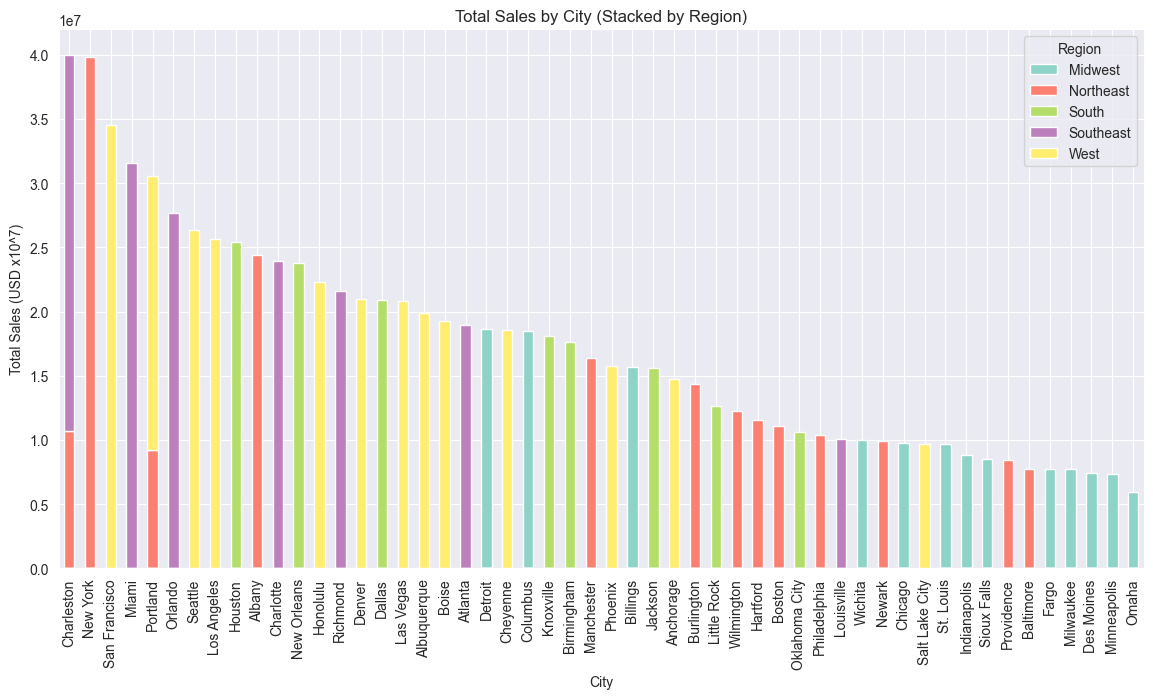

In [324]:
# Stacking bars ontop of each other to see the proportion of sales by region which is indicated by the colours in the legend
stacked = df.groupby(["City", "Region"])["Total Sales"].sum().unstack(fill_value=0)

# Order cities by total sales by adding up each of the cities' region's sales
stacked = stacked.loc[stacked.sum(axis=1).sort_values(ascending=False).index]

stacked.plot(
    kind="bar",
    stacked=True,
    figsize=(14, 7),
    colormap="Set3"
)

plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Total Sales (USD x10^7)")
plt.title("Total Sales by City (Stacked by Region)")
plt.legend(title="Region")
plt.show()

In [332]:
city_product_sales = df.groupby(['City', 'Product'])['Units Sold'].sum().reset_index()
most_sold_product_per_city = city_product_sales.sort_values(['Units Sold'], ascending=[False]).reset_index()
top_products = most_sold_product_per_city.groupby('Units Sold').head()
print(top_products)

     index         City                    Product  Units Sold
0       62   Charleston      Men's Street Footwear       23819
1      212     New York      Men's Street Footwear       22707
2      213     New York            Women's Apparel       19472
3      211     New York    Men's Athletic Footwear       18581
4      254     Portland      Men's Street Footwear       18185
..     ...          ...                        ...         ...
307     24    Baltimore              Men's Apparel        1951
308    198  Minneapolis              Men's Apparel        1912
309    232        Omaha  Women's Athletic Footwear        1761
310     28    Baltimore  Women's Athletic Footwear        1725
311    228        Omaha              Men's Apparel        1455

[312 rows x 4 columns]


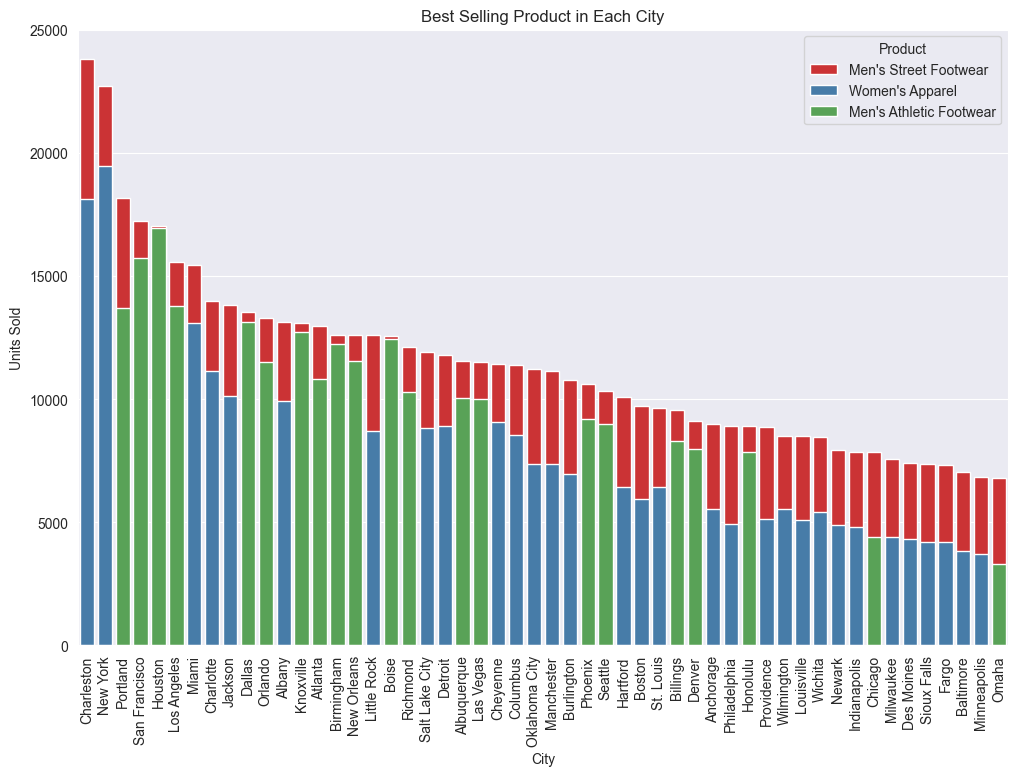

In [321]:
#Sort by most units sold
top_products = top_products.sort_values( "Units Sold", ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(
    data=top_products,
    x='City',
    y='Units Sold',
    hue='Product',
    dodge=False,   # make one bar per city coloured by product (stacked but still showing its real value along the y-axis)
    palette="Set1"
)
plt.xticks(rotation=90)
plt.title("Best Selling Product in Each City")
plt.ylabel("Units Sold")
plt.xlabel("City")
plt.legend(title="Product")
plt.show()

Sales Method
Online      4889
Outlet      3019
In-store    1740
Name: count, dtype: int64 

Product
Men's Street Footwear        1610
Men's Athletic Footwear      1610
Women's Street Footwear      1608
Women's Apparel              1608
Women's Athletic Footwear    1606
Men's Apparel                1606
Name: count, dtype: int64 



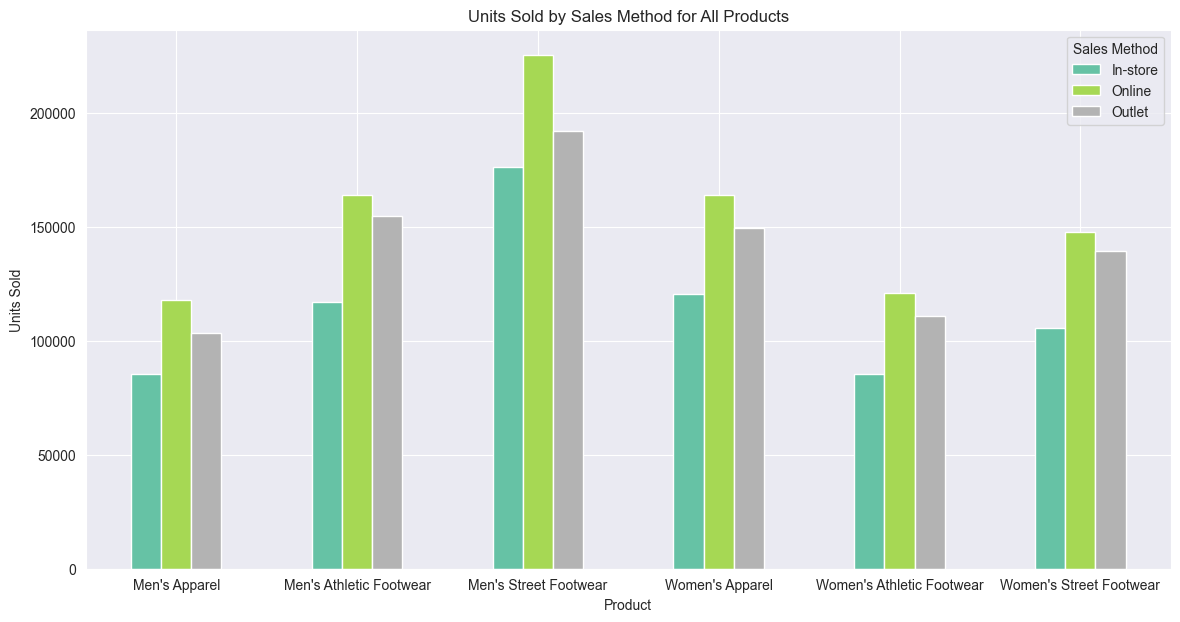

In [322]:
#Print how many times each sales method was used
sales_methods = df['Sales Method'].value_counts()
print(sales_methods, '\n')

#Print the number of items in each product category
all_products = df['Product'].value_counts()
print(all_products, '\n')

#Group products by sales method
sales_method_product = df.groupby(['Product', 'Sales Method'])['Units Sold'].sum().unstack(fill_value=0)

sales_method_product.plot(
    kind='bar',
    figsize=(14,7),
    colormap="Set2"
)

plt.title("Units Sold by Sales Method for All Products")
plt.ylabel("Units Sold")
plt.xlabel("Product")
plt.xticks(rotation=360)
plt.legend(title="Sales Method")
plt.show()

                     Product  Operating Profit (Millions)
0      Men's Street Footwear                    82.802261
1            Women's Apparel                    68.650971
2    Men's Athletic Footwear                    51.846888
3    Women's Street Footwear                    45.095827
4              Men's Apparel                    44.763030
5  Women's Athletic Footwear                    38.975785 



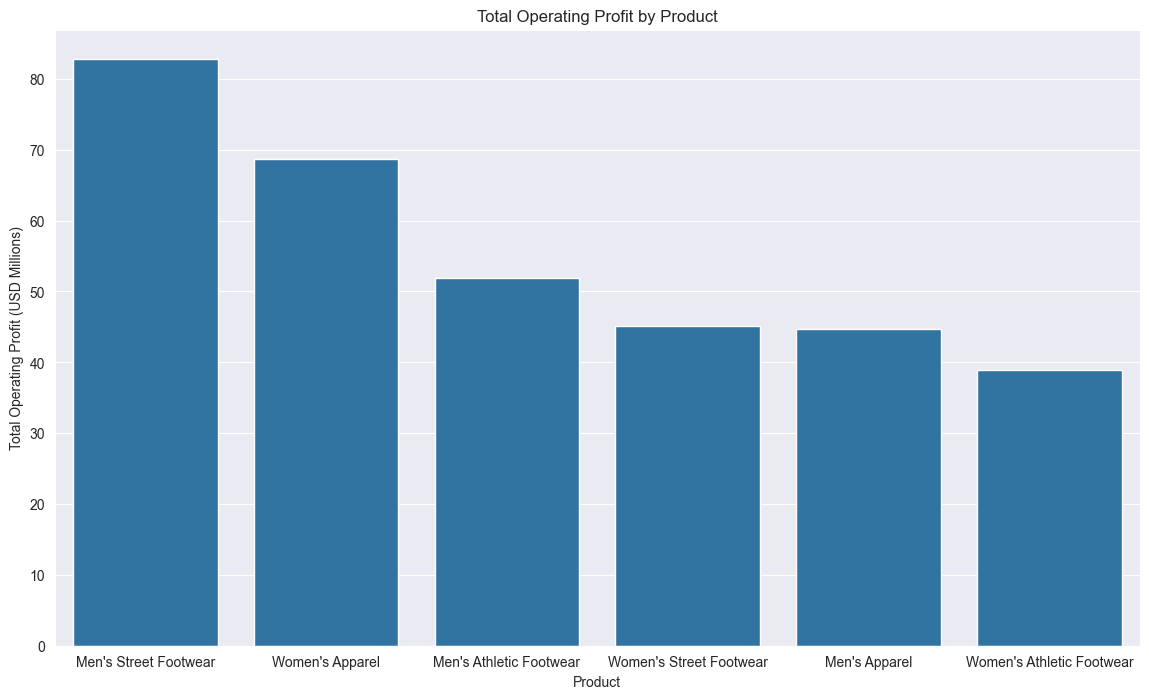

In [310]:
#Group by product to get total profit
profit_by_product = (df.groupby(["Product"])["Operating Profit"].sum().reset_index().sort_values("Operating Profit", ascending=False).reset_index())
profit_by_product["Operating Profit (Millions)"] = profit_by_product["Operating Profit"] / 1e6

print(profit_by_product[["Product", "Operating Profit (Millions)"]], "\n")

plt.figure(figsize=(14,8))
sns.barplot(
    data=profit_by_product,
    x="Product",
    y="Operating Profit (Millions)",
    dodge=True
)

plt.title("Total Operating Profit by Product")
plt.ylabel("Total Operating Profit (USD Millions)")
plt.xlabel("Product")
plt.show()

  Sales Method  Operating Profit (Millions)
0     In-store                   127.591288
1       Outlet                   107.988297
2       Online                    96.555176 



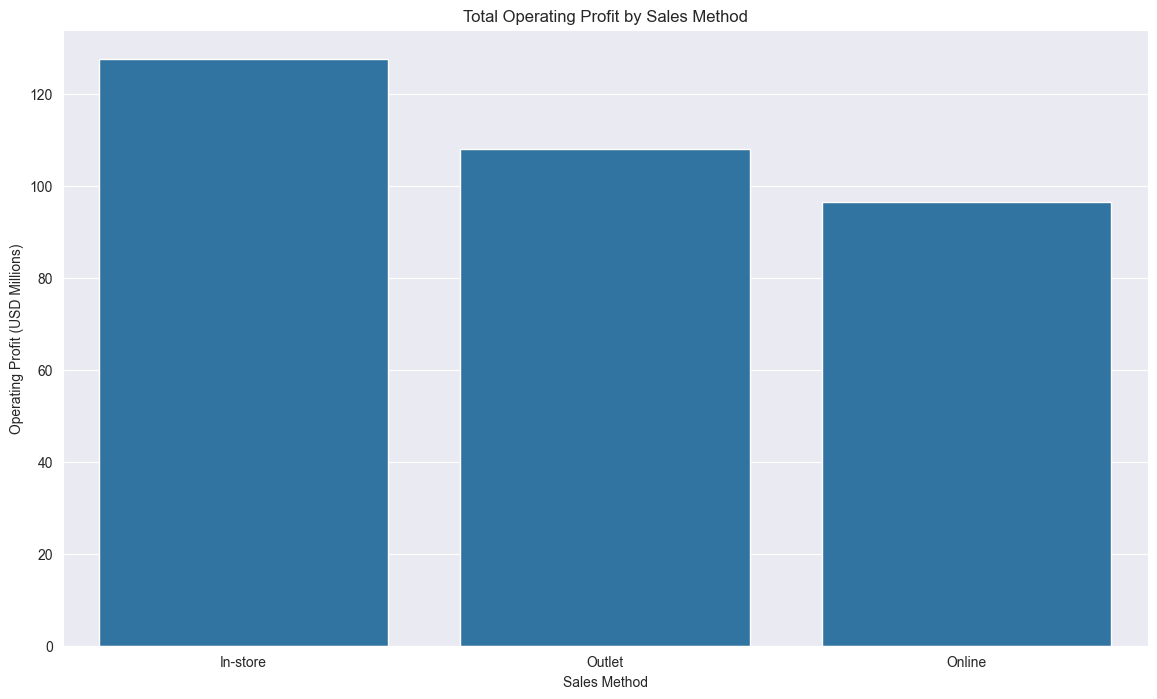

In [311]:
profit_by_method = (df.groupby(["Sales Method"])["Operating Profit"].sum().reset_index().sort_values("Operating Profit", ascending=False).reset_index())
profit_by_method["Operating Profit (Millions)"] = profit_by_method["Operating Profit"] / 1e6

print(profit_by_method[["Sales Method", "Operating Profit (Millions)"]], "\n")

plt.figure(figsize=(14,8))
sns.barplot(
    data=profit_by_method,
    x="Sales Method",
    y="Operating Profit (Millions)",
    dodge=True
)

plt.title("Total Operating Profit by Sales Method")
plt.ylabel("Operating Profit (USD Millions)")
plt.xlabel("Sales Method")
plt.show()

  Sales Method                  Product  Operating Profit (Millions)
0     In-store    Men's Street Footwear                    34.867100
1     In-store          Women's Apparel                    26.285125
2       Outlet    Men's Street Footwear                    24.977139
3       Online    Men's Street Footwear                    22.958022
4       Outlet          Women's Apparel                    21.522246
5       Online          Women's Apparel                    20.843599
6     In-store  Men's Athletic Footwear                    19.702375
7     In-store            Men's Apparel                    17.474500
8       Outlet  Women's Street Footwear                    16.690954
9       Outlet  Men's Athletic Footwear                    16.470335


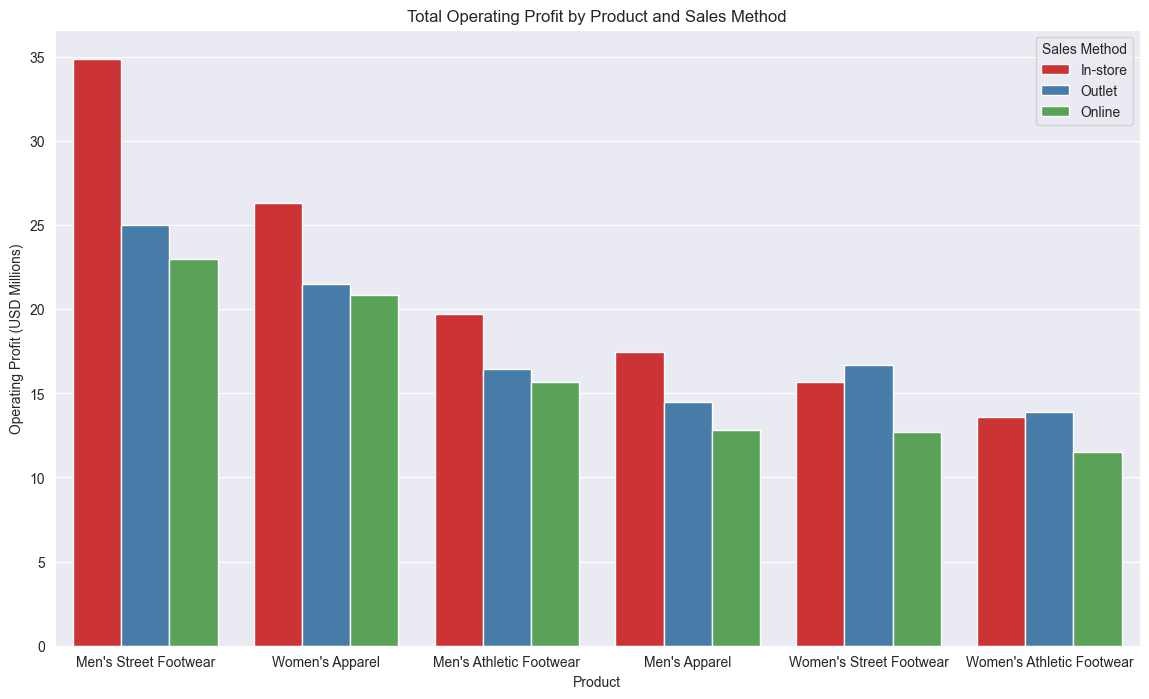

In [325]:
profit_by_product_and_method = df.groupby(["Sales Method", "Product"])["Operating Profit"].sum().reset_index().sort_values("Operating Profit", ascending=False).reset_index()
profit_by_product_and_method["Operating Profit (Millions)"] = profit_by_product_and_method["Operating Profit"] / 1e6

print(profit_by_product_and_method[["Sales Method","Product","Operating Profit (Millions)"]].head(10)) #top 10

plt.figure(figsize=(14,8))
sns.barplot(
    data=profit_by_product_and_method,
    x="Product",
    y="Operating Profit (Millions)",
    hue="Sales Method",
    palette="Set1",
    dodge=True
)

plt.title("Total Operating Profit by Product and Sales Method")
plt.ylabel("Operating Profit (USD Millions)")
plt.xlabel("Product")
plt.legend(title="Sales Method")
plt.show()

        Month  Units Sold
0     January      227632
1    February      193959
2       March      190960
3       April      216426
4         May      214605
5        June      181014
6        July      218700
7      August      257721
8   September      228550
9     October      183001
10   November      174502
11   December      191791 



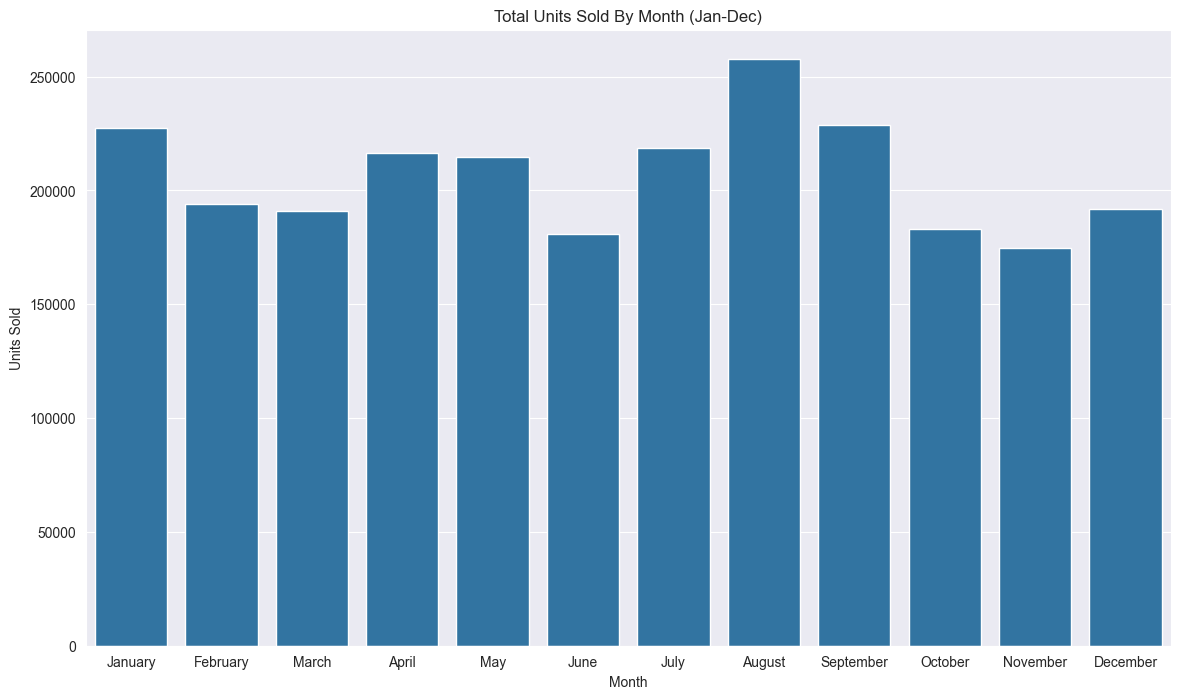

In [313]:
df["Month"] = df["Invoice Date"].dt.month_name()
df["Month Number"] = df["Invoice Date"].dt.month

#Sort by increasing month number but show the month name
sales_by_date = df.groupby(["Month Number", "Month"])["Units Sold"].sum().reset_index().sort_values("Month Number")

print(sales_by_date[["Month", "Units Sold"]], "\n")

plt.figure(figsize=(14,8))
sns.barplot(
    data=sales_by_date,
    x="Month",
    y="Units Sold"
)

plt.title("Total Units Sold By Month (Jan-Dec)")
plt.ylabel("Units Sold")
plt.xlabel("Month")
plt.show()

        Month  Units Sold
0      August      257721
1   September      228550
2     January      227632
3        July      218700
4       April      216426
5         May      214605
6    February      193959
7    December      191791
8       March      190960
9     October      183001
10       June      181014
11   November      174502 



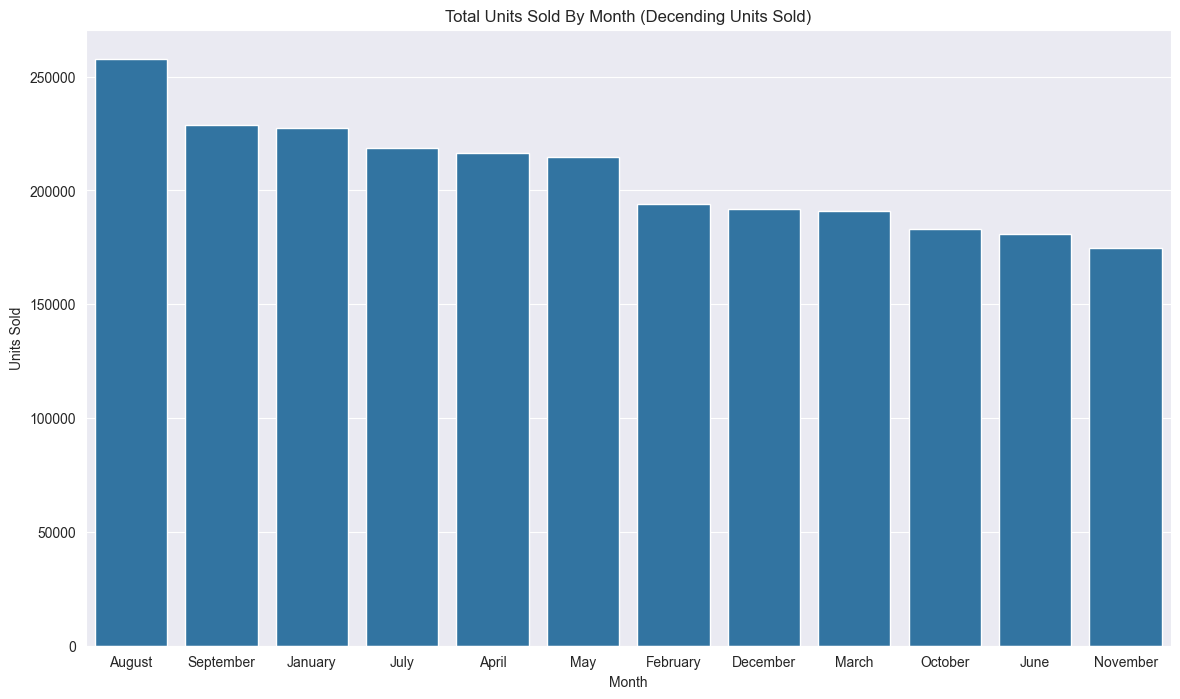

In [314]:

sales_by_date = df.groupby(["Month"])["Units Sold"].sum().reset_index().sort_values("Units Sold", ascending=False).reset_index()

print(sales_by_date[["Month", "Units Sold"]], "\n")

plt.figure(figsize=(14, 8))
sns.barplot(
    data=sales_by_date,
    x="Month",
    y="Units Sold"
)

plt.title("Total Units Sold By Month (Decending Units Sold)")
plt.ylabel("Units Sold")
plt.xlabel("Month")
plt.show()

   Price Range Label  Units Sold
0            $41–$51      680141
1            $51–$61      550990
2            $31–$41      495659
3            $61–$71      273944
4            $21–$31      238634
5            $71–$81       90605
6            $11–$21       83444
7            $81–$91       41288
8           $91–$101       13401
9          $101–$111        5944
10            $1–$11        4811 



/var/folders/h9/78d8y54s1094rhy0vxgr6w400000gn/T/ipykernel_30216/2338280880.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_price = df.groupby(["Price Range Label"])["Units Sold"].sum().reset_index().sort_values("Units Sold", ascending=False).reset_index()


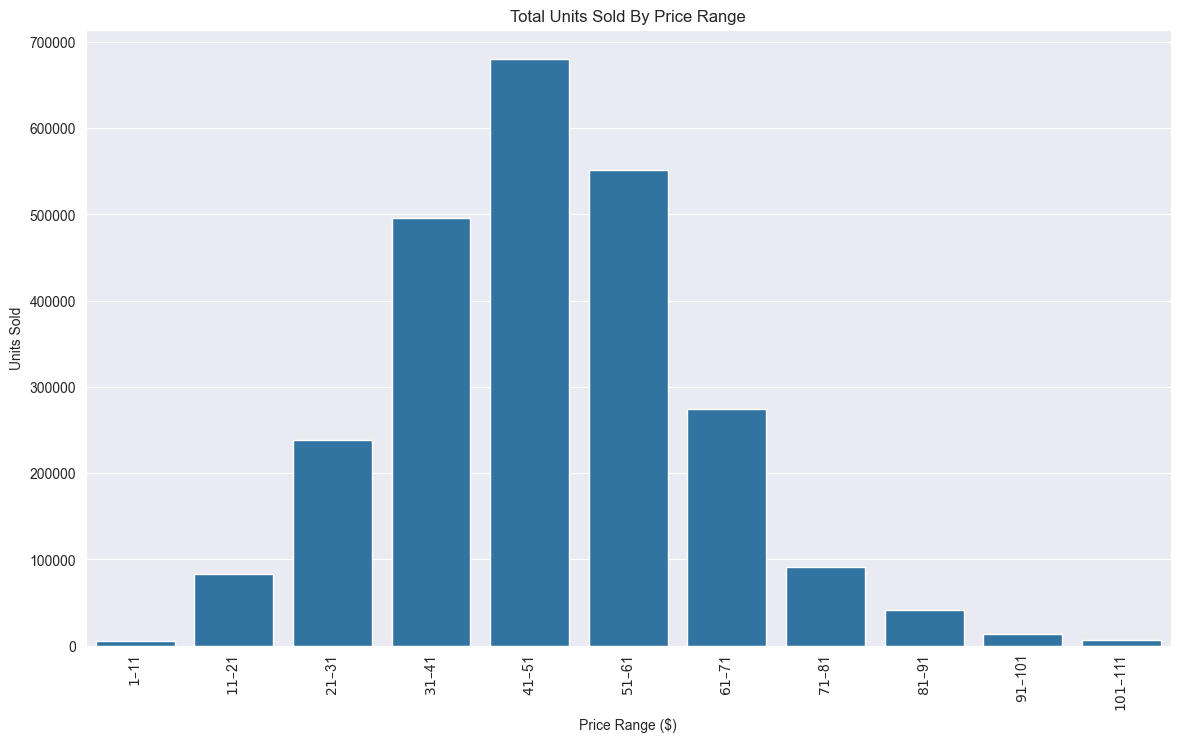

In [315]:
#Separate prices into 11 bins of price ranges
df["Price Range"] =pd.cut(df["Price per Unit"], bins=range(1,  int(df["Price per Unit"].max()) + 10, 10), right=False)
#Label the prices to show the actual range
df["Price Range Label"] = df["Price Range"].apply(lambda x: f"${int(x.left)}–${int(x.right)}")

sales_by_price = df.groupby(["Price Range Label"])["Units Sold"].sum().reset_index().sort_values("Units Sold", ascending=False).reset_index()
print(sales_by_price[["Price Range Label", "Units Sold"]], "\n")

plt.figure(figsize=(14, 8))
sns.barplot(
    data=sales_by_price,
    x="Price Range Label",
    y="Units Sold"
)

plt.title("Total Units Sold By Price Range")
plt.ylabel("Units Sold")
plt.xlabel("Price Range ($)")
plt.xticks(rotation=90)
plt.show()